In [308]:
import platform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 한글 깨짐 방지
if platform.system() == 'Darwin':
    # 맥일때
    plt.rcParams["font.family"] = 'AppleGothic'
elif platform.system() == 'Windows':
    # 윈도우일때
    plt.rcParams["font.family"] = 'Malgun Gothic'
# 마이너스기호(-) 폰트 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [309]:
# train data와 test data 둘다 확인하기 위해 read
df_train = pd.read_csv("data_titanic/train.csv")
df_test = pd.read_csv("data_titanic/test.csv")

In [310]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [311]:
df_test.head(5) # test data에는 survived 값이 없음, 이것을 예측해야 함

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [312]:
# train dataframe 칼럼명 소문자로 변환
df_train.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [313]:
# test dataframe 칼럼명 소문자로 변환
df_test.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_test.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

### 변수 설명
* survived: 생존 여부 => 0 = No, 1 = Yes
* pclass: 티켓 등급 => 1 = 1st, 2 = 2nd, 3 = 3rd
* sex: 성별
* age: 나이
* sibsp: 함께 탑승한 형제자매, 배우자의 수
* parch: 함께 탑승한 부모, 자식의 수
* ticket: 티켓 번호
* fare: 운임
* cabin: 객실 번호
* Embarked: 탑승 항구 => C = Cherbourg, Q = Queenstown, S = Southampton

In [314]:
# train data NaN값 확인
df_train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [315]:
# test data NaN값 확인
df_test.isna().sum()

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

* 나이(age)         : 결측값이 train, test에 많이 포함되어 있고, 나이는 주요 생존 예측 별수이므로 채우는 것으로 결정
* 객실번호(cabin)    : 생존 예측에 의미있는 값인지 확인 후 해당 칼럼은 버리는 것으로 결정
* 탑승항구(embarked) : 2개 밖에 결측값이 없으므로 해당 샘플을 삭제해도 무방하나 채우는 것으로 결정
* 티켓요금(fare)     : test에 1개의 결측치발견, 답안 제출을 위해 삭제하면 안될것 같음, 최빈값 채우기로 결정

In [316]:
# cabin에 어떤 값이 들어있는지 확인
df_train.cabin.head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: cabin, dtype: object

In [317]:
# 객실번호 카운트
df_train.cabin.value_counts().head(20)

C23 C25 C27        4
B96 B98            4
G6                 4
F2                 3
F33                3
E101               3
D                  3
C22 C26            3
B20                2
B28                2
B49                2
B18                2
C124               2
C83                2
B57 B59 B63 B66    2
B35                2
C92                2
B51 B53 B55        2
C125               2
B77                2
Name: cabin, dtype: int64

In [318]:
# 역시 cabin은 버리는 걸로, 데이터프레임에서 완전 삭제
del df_train["cabin"]
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [319]:
# test data에서도 삭제
del df_test["cabin"]
df_test.columns

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked'],
      dtype='object')

In [320]:
# train data 탑승 항구 확인
df_train["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [321]:
# test data 탑승 항구 확인
df_test["embarked"].value_counts()

S    270
C    102
Q     46
Name: embarked, dtype: int64

In [322]:
# S(Southampton) 항구가 가장 많이 탑승한 것으로 확인됨
# S로 채우는 것으로 결정, 채우고 나면 644명에서 646명으로 2명 증가
df_train["embarked"] = df_train["embarked"].fillna("S")
df_train["embarked"].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

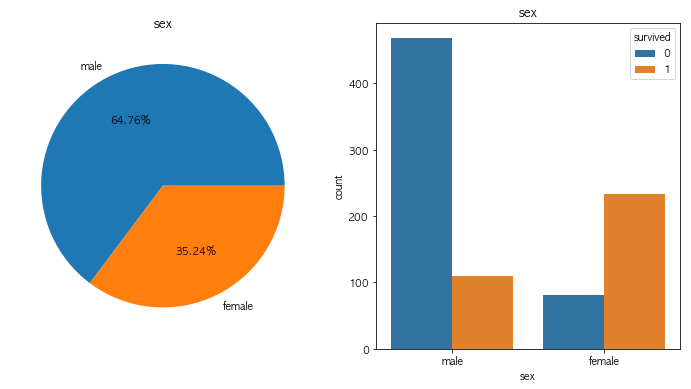

In [323]:
# 성별 기준 생존자 확인
# 남성이 여성보다 생존률이 많이 낮음
# feature값으로 사용하기로 결정

f,ax=plt.subplots(1,2,figsize=(12,6))

df_train['sex'].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title('sex')
ax[0].set_ylabel('')

sns.countplot('sex', hue="survived", data=df_train, ax=ax[1])
ax[1].set_title('sex')
plt.show()

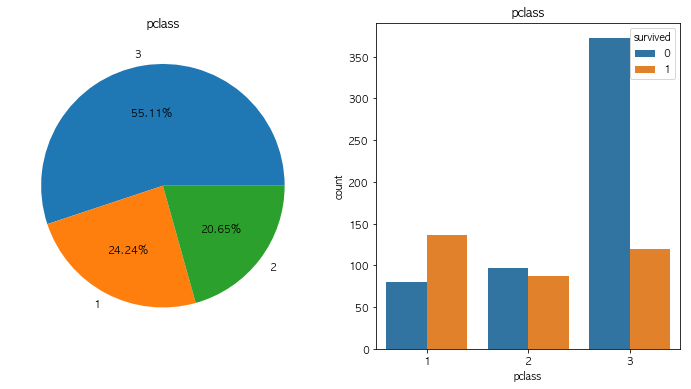

In [324]:
# 티켓 등급으로 확인
# 1, 2등급에 비해 3등급 사망자 많음
# feature로 활용하기로 결정

# column_name 변수 정의해서 손쉽게 칼럼명 바꿔가면서 그래프 확인하도록 수정
column_name = "pclass"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

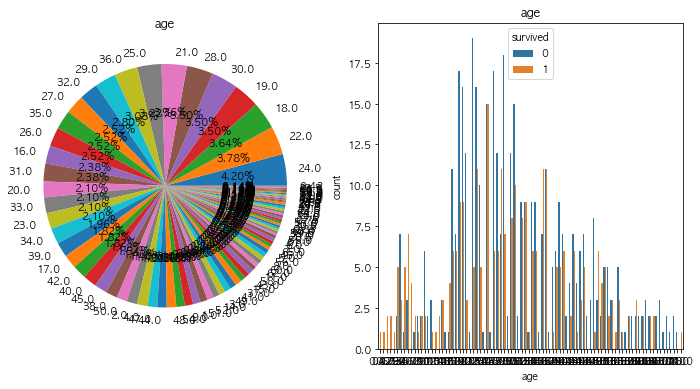

In [235]:
# 나이로 확인
# 나이대가 아닌 개별 나이라 그래프 확인 어려움
column_name = "age"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [325]:
# 나이대 파생변수 추가, 10씩 증가
df_train["age_group"] = pd.cut(df_train.age,
                                bins = [0, 10, 20, 30, 40, 50, 60, 70, 80],
                                right = True) # 오른쪽 값 포함, 20살이면 11~20, default

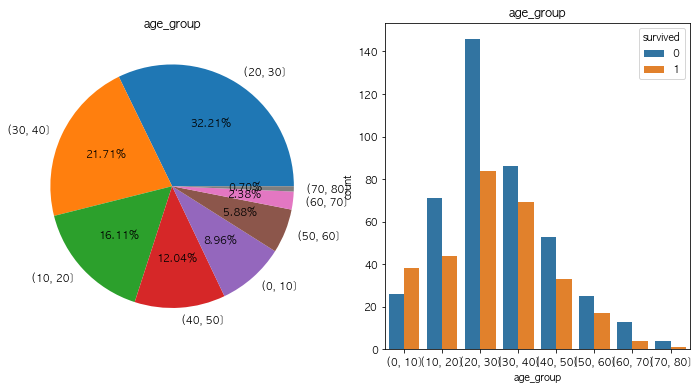

In [326]:
# 나이와 생존률 확인
# 20~30대에 특히 사망자 많음
# feature로 활용하기로 결정

column_name = "age_group"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

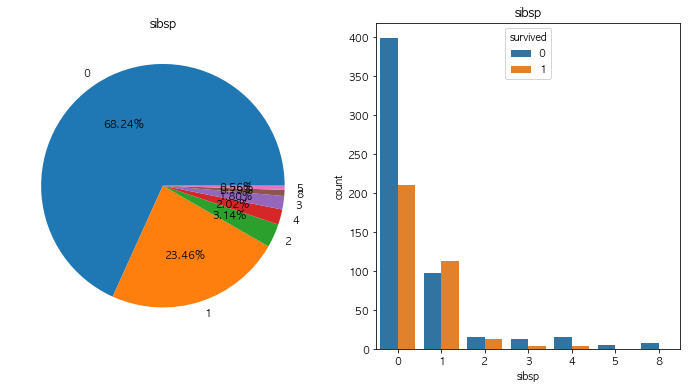

In [327]:
# 함께 탑승한 형제자매, 배우자 수로 생존률 확인
# 혼자 탑승한 경우 사망자가 많음
# feature값으로 활용

column_name = "sibsp"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

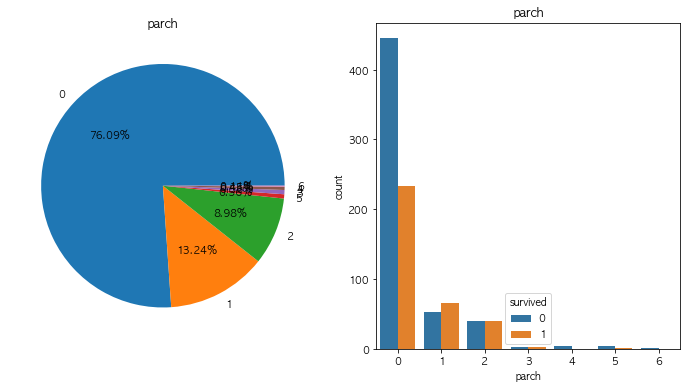

In [328]:
# 함께 탐승한 부모, 자식의 수와 생존률 확인
# 형제자매, 배우자 수와 같이 혼자 탑승한 경우 생존률 낮음
# feature값으로 활용

column_name = "parch"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

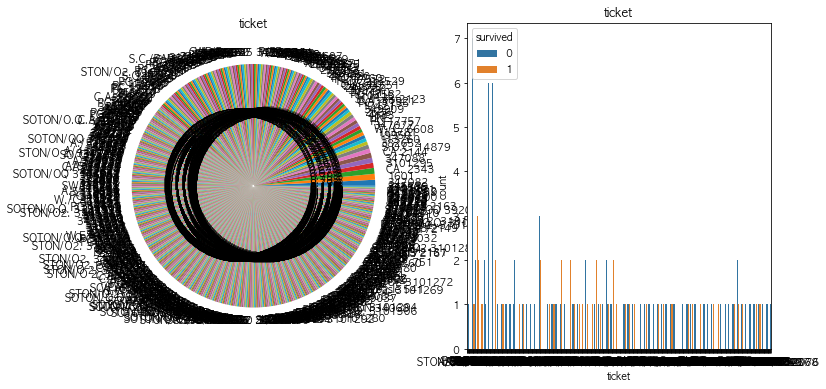

In [240]:
# 티켓번호로 생존률 확인
# 티켓 번호 종류가 너무 많음

column_name = "ticket"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [329]:
# 티켓 번호 카운트
df_train.ticket.value_counts().head(20)

347082          7
1601            7
CA. 2343        7
3101295         6
347088          6
CA 2144         6
S.O.C. 14879    5
382652          5
113760          4
19950           4
113781          4
W./C. 6608      4
347077          4
PC 17757        4
LINE            4
4133            4
2666            4
349909          4
17421           4
PC 17755        3
Name: ticket, dtype: int64

In [330]:
# 티켓 번호도 객실 번호와 마찬가지로 생존 예측에 사용하지 않는 것으로 결정
# 데이터프레임에서 삭제
del df_train["ticket"]
del df_test["ticket"]
print(df_train.columns)
print(df_test.columns)

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'fare', 'embarked', 'age_group'],
      dtype='object')
Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')


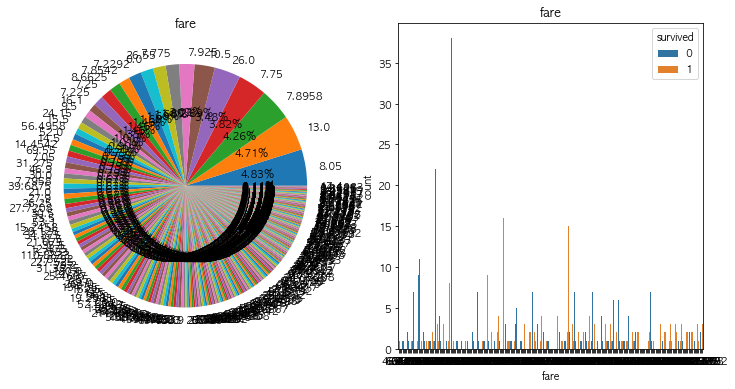

In [243]:
# 요금과 생존률 상관 관계 확인
# 요금도 나이와 마찬가지로 연속값

column_name = "fare"
f,ax=plt.subplots(1,2,figsize=(12,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

In [331]:
# 요금 최소값, 최대값 확인
# 무료로 탑승한 경우도 있음
print("fare_min : {}".format(df_train.fare.min()))
print("fare_max : {}".format(df_train.fare.max()))

fare_min : 0.0
fare_max : 512.3292


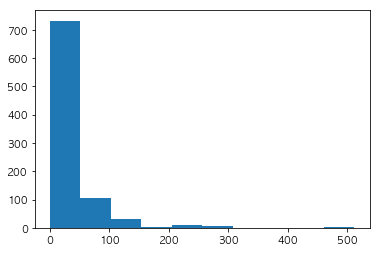

In [332]:
# 요금 히스토그램 확인
# 100 이하에 대부분 분포
plt.hist(df_train["fare"])
plt.show()

In [333]:
# 요금대 파생변수 추가
df_train["fare_group"] = pd.cut(df_train.fare,
                                bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
                                right = False) # 요금 0이 포함되어야 하므로 right = False로 처리, 왼쪽값 포함, 즉 0 ~ 49가 됨

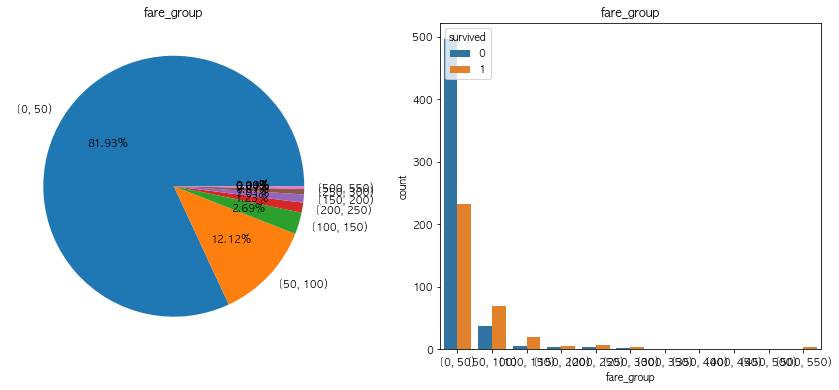

In [334]:
# 요금대로 생존여부 확인
# 50이하 요금이 사망자 많음
column_name = "fare_group"
f,ax=plt.subplots(1,2,figsize=(15,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

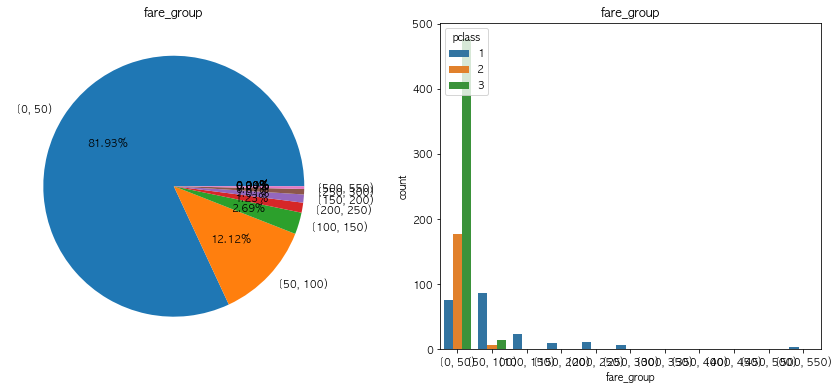

In [335]:
# 요금과 객실등급 상관관계 확인
# 3등급 객실은 대부분 객실요금 50이하로 확인
column_name = "fare_group"
f,ax=plt.subplots(1,2,figsize=(15,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="pclass", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

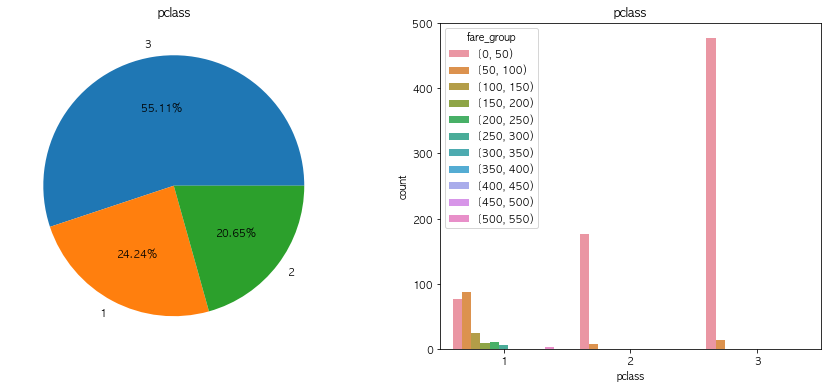

In [336]:
# 객실 요금 대비 객실 등급 확인
# 2,3등급에는 객실요금 100이상은 없음
# 객실 요금도 feature값으로 사용

column_name = "pclass"
f,ax=plt.subplots(1,2,figsize=(15,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="fare_group", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

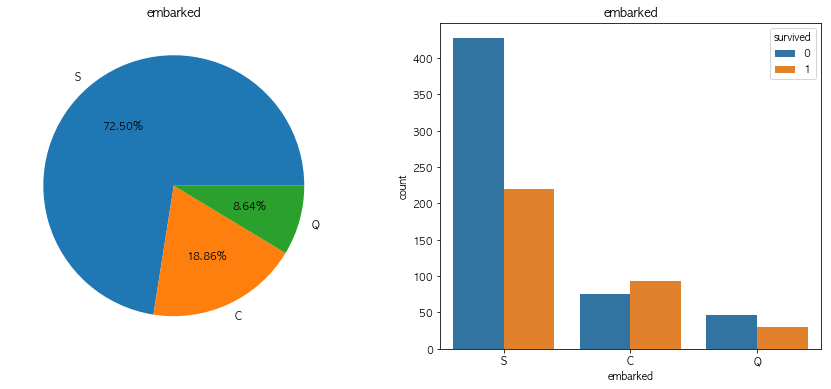

In [337]:
# 탑승 항구별 생존 여부 확인
# S항구 탑승자가 가장 많고, 가장 많이 사망함

column_name = "embarked"
f,ax=plt.subplots(1,2,figsize=(15,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="survived", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

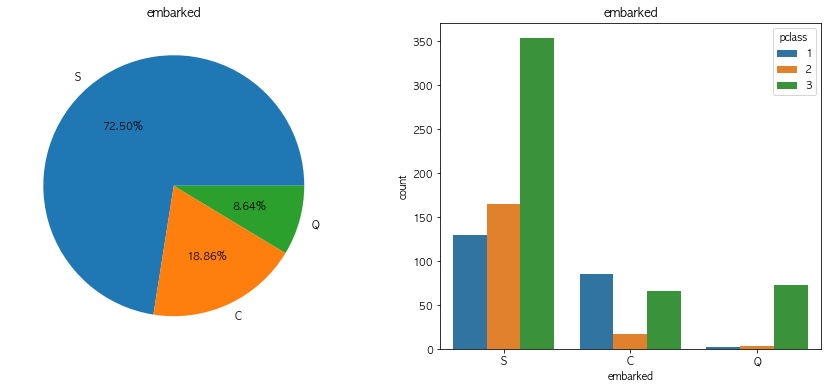

In [338]:
# 탑승항구별 티켓 등급 확인
# S항구가 3등급이 가장 많이 분포
# 탑승항구도 feature값으로 사용하기로 결정

column_name = "embarked"
f,ax=plt.subplots(1,2,figsize=(15,6))

df_train[column_name].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title(column_name)
ax[0].set_ylabel('')

sns.countplot(column_name, hue="pclass", data=df_train, ax=ax[1])
ax[1].set_title(column_name)
plt.show()

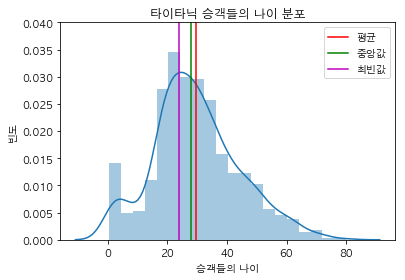

In [339]:
# 나이 결측값을 처리하기 위해 나이 분포, 평균값, 중앙값, 최빈값 확인
# 아래 강좌 참고
# https://datascienceschool.net/view-notebook/8cbbdd4daaf84c0492d440b9a819c8be/
sns.distplot(df_train.age.dropna())
plt.title("타이타닉 승객들의 나이 분포")
plt.xlabel("승객들의 나이")
plt.ylabel("빈도")
plt.plot([df_train.age.mean(), df_train.age.mean()], [0, 1], "r", label="평균")
plt.plot([df_train.age.median(), df_train.age.median()], [0, 1], "g", label="중앙값")
plt.plot([df_train.age.mode(), df_train.age.mode()], [0, 1], "m", label="최빈값")
plt.ylim(0,0.04)
plt.legend()
plt.show()

In [340]:
# 나이 최빈값 확인, 24세
df_train.age.mode()

0    24.0
dtype: float64

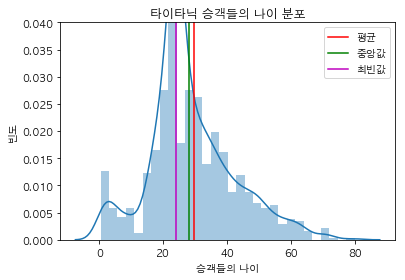

In [341]:
# 결측값을 최빈값으로 채웠을 때의 나이 분포
# 평균값, 중앙값으로 채운다고 해도 결과가 왜곡될 가능성이 있다고 판단됨
sns.distplot(df_train.age.fillna(df_train.age.fillna(df_train.age.mode()[0])))
plt.title("타이타닉 승객들의 나이 분포")
plt.xlabel("승객들의 나이")
plt.ylabel("빈도")
plt.plot([df_train.age.mean(), df_train.age.mean()], [0, 1], "r", label="평균")
plt.plot([df_train.age.median(), df_train.age.median()], [0, 1], "g", label="중앙값")
plt.plot([df_train.age.mode(), df_train.age.mode()], [0, 1], "m", label="최빈값")
plt.ylim(0,0.04)
plt.legend()
plt.show()

In [342]:
# 위와 다른 방법으로 scikit learn의 Imputer를 사용하여 결측값 채우기 위해 모듈 로드
# from sklearn.preprocessing import Imputer # 이걸로 했을 때 버전 바뀌면서 이름 바뀌었다고 메시지 나와서 다시 아래줄로 로드
from sklearn.impute import SimpleImputer

In [343]:
# SimpleImputer()를 이용해 채우기 했을 때 어떤 형태로 들어가는지 확인
# 29.69911765값으로 채워지는 것이 이전에는 NaN값인 부분
simpleimputer = SimpleImputer(strategy='mean') # mean(default), median, most_frequent(최빈값), constant(특정값)
simpleimputer.fit_transform(df_train["age"].values.reshape(-1,1))

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

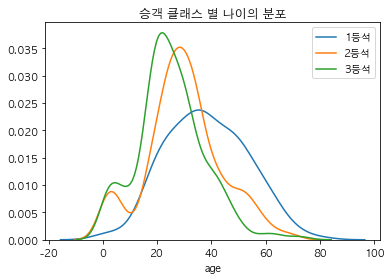

In [344]:
# 그냥 전체 평균, 최빈값, 중앙값으로 채우기에는 뭔가 안될것 같다는 생각
# 티켓 등급별 나이 분포 확인
# 꼭 티켓 등급만이 아니라 성별, 요금 등으로 구분하여 결정할 수도 있음

sns.distplot(df_train[df_train.pclass == 1].age.dropna(), hist=False, label="1등석")
sns.distplot(df_train[df_train.pclass == 2].age.dropna(), hist=False, label="2등석")
sns.distplot(df_train[df_train.pclass == 3].age.dropna(), hist=False, label="3등석")
plt.title("승객 클래스 별 나이의 분포")
plt.show()

In [345]:
# 전체 나이에 따라서는 왜도 > 0이라 왼쪽으로 치우쳐 있었는데,
# 티켓 등급으로 확인해보니 전체적으로 왜도 = 0에 가까움,
# 중앙값, 또는 최빈값이 아닌 평균값으로 채워도 될것 같음,
# 각 티켓 등급별 평균 나이 확인
print("1등석 평균 : {}".format(df_train[df_train.pclass == 1].age.mean()))
print("2등석 평균 : {}".format(df_train[df_train.pclass == 2].age.mean()))
print("3등석 평균 : {}".format(df_train[df_train.pclass == 3].age.mean()))

1등석 평균 : 38.233440860215055
2등석 평균 : 29.87763005780347
3등석 평균 : 25.14061971830986


#### 아래 코드 설명
1. age값이 없는 행의 행번호를 받아서 순서대로 i에 대입하는 방식으로 for문 시작
2. 해당 i행의 티켓등급이 1등급이면
3. 비여 있는 나이에 1등급 평균 나이 대입
4. 해당 i행의 티켓등급이 2등급이면
5. 비여 있는 나이에 2등급 평균 나이 대입
6. 나머지는
7. 비여 있는 나이에 3등급 평균 나이 대입

In [346]:
for i in df_train.age[df_train.age.isna()].index:
    if df_train.pclass.loc[i] == 1:
        df_train.age.loc[i] = df_train[df_train.pclass == 1].age.mean()
    elif df_train.pclass.loc[i] == 2:
        df_train.age.loc[i] = df_train[df_train.pclass == 2].age.mean()
    else:
        df_train.age.loc[i] = df_train[df_train.pclass == 3].age.mean()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [347]:
# 잘 들어갔는지 나이 결측값 확인
print(df_train.age.isna().sum())

0


In [348]:
# 해당 칼럼 데이터값 확인
df_train["age"].values

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       25.14061972, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.87763006, 31.        , 25.14061972,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 25.14061972, 19.        , 25.14061972, 25.14061972,
       40.        , 38.23344086, 25.14061972, 66.        , 28.        ,
       42.        , 25.14061972, 21.        , 18.        , 14.        ,
       40.        , 27.        , 25.14061972,  3.        , 19.        ,
       25.14061972, 25.14061972, 25.14061972, 25.14061972, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       38.23344086, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 38.23344086,
       25.14061972, 29.        , 19.        , 17.        , 26.  

In [349]:
# train data NaN값 확인
df_train.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
age_group      177
fare_group       0
dtype: int64

In [350]:
# age_group, fare_group는 테이터 탐색을 위해 파생한 변수이므로 삭제
del df_train["age_group"]
del df_train["fare_group"]
df_train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'fare', 'embarked'],
      dtype='object')

In [351]:
# train data NaN값 확인
df_train.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
dtype: int64

In [352]:
# test data NaN값 확인
df_test.isna().sum()

passengerid     0
pclass          0
name            0
sex             0
age            86
sibsp           0
parch           0
fare            1
embarked        0
dtype: int64

In [353]:
# test data의 fare 결측값을 최빈값으로 채우기
simpleimputer = SimpleImputer(strategy='most_frequent') # mean(default), median, most_frequent(최빈값), constant(특정값)
df_test["fare"] = simpleimputer.fit_transform(df_test["fare"].values.reshape(-1,1))

In [354]:
# test data NaN값 확인
df_test.isna().sum()

passengerid     0
pclass          0
name            0
sex             0
age            86
sibsp           0
parch           0
fare            0
embarked        0
dtype: int64

In [355]:
# test data도 train과 마찬가지로 age 결측값 처리
# 단 test data상의 티켓 등급별 평균값이 아닌 train data상의 평균값으로 채우기로 결정
for i in df_test.age[df_test.age.isna()].index:
    if df_test.pclass.loc[i] == 1:
        df_test.age.loc[i] = df_train[df_train.pclass == 1].age.mean()
    elif df_test.pclass.loc[i] == 2:
        df_test.age.loc[i] = df_train[df_train.pclass == 2].age.mean()
    else:
        df_test.age.loc[i] = df_train[df_train.pclass == 3].age.mean()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [356]:
# 최종 결측치 확인
df_test.isna().sum()

passengerid    0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
dtype: int64

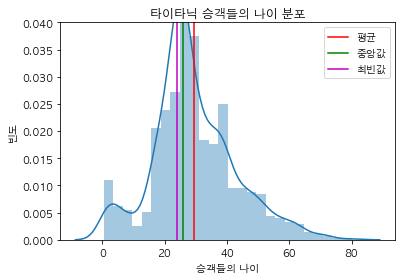

In [357]:
#sns.distplot(df_train.age.dropna())
sns.distplot(df_train.age)
plt.title("타이타닉 승객들의 나이 분포")
plt.xlabel("승객들의 나이")
plt.ylabel("빈도")
plt.plot([df_train.age.mean(), df_train.age.mean()], [0, 1], "r", label="평균")
plt.plot([df_train.age.median(), df_train.age.median()], [0, 1], "g", label="중앙값")
plt.plot([df_train.age.mode(), df_train.age.mode()], [0, 1], "m", label="최빈값")
plt.ylim(0,0.04)
plt.legend()
plt.show()

In [358]:
df_train.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S


In [359]:
# 텍스트 범주(sex, emparked)를 숫자 범주, 또는 one-hot encoding 처리하기 위해 데이터프레임 카피
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [360]:
# train data 성별 여자 = 0, 남자 = 1로 변경
df_train2['sex'] = df_train2['sex'].map({'female': 0, 'male': 1})
df_train2.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S


In [361]:
df_test2.head(3)

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q


In [362]:
# test data 성별 여자 = 0, 남자 = 1로 변경
df_test2['sex'] = df_test2['sex'].map({'female': 0, 'male': 1})
df_test2.head(3)

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q


In [367]:
# embarked one-hot encoding
# https://www.kaggle.com/jf2333/titanic-solutions-ed327a-one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

In [369]:
# OneHotEncoder 사용하기 위해 1 by N -> n by 1 행렬변환

train_embarked = df_train2["embarked"].values.reshape(-1,1)
test_embarked = df_test2["embarked"].values.reshape(-1,1)

In [371]:
# one hot encoding

onehot_encoder = OneHotEncoder(sparse=False)
train_OneHotEncoded = onehot_encoder.fit_transform(train_embarked)
test_OneHotEncoded = onehot_encoder.fit_transform(test_embarked)

In [380]:
# one hot encoding 결과를 각각 train, test 데이터프레임에 추가

df_train2["embarked_C"] = train_OneHotEncoded[:,0]
df_train2["embarked_Q"] = train_OneHotEncoded[:,1]
df_train2["embarked_S"] = train_OneHotEncoded[:,2]
df_test2["embarked_C"] = test_OneHotEncoded[:,0]
df_test2["embarked_Q"] = test_OneHotEncoded[:,1]
df_test2["embarked_S"] = test_OneHotEncoded[:,2]

In [383]:
# 칼럼 추가 내용 확인
df_train2.head(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,embarked_C,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,7.2500,S,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,71.2833,C,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,7.9250,S,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,53.1000,S,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,8.0500,S,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",1,25.14062,0,0,8.4583,Q,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,51.8625,S,0.0,0.0,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,21.0750,S,0.0,0.0,1.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,11.1333,S,0.0,0.0,1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00000,1,0,30.0708,C,1.0,0.0,0.0


In [382]:
# 칼럼 추가 내용 확인
df_test2.head(10)

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked,embarked_C,embarked_Q,embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S,0.0,0.0,1.0
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,9.2250,S,0.0,0.0,1.0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,7.6292,Q,0.0,1.0,0.0
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,29.0000,S,0.0,0.0,1.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,7.2292,C,1.0,0.0,0.0
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,24.1500,S,0.0,0.0,1.0


In [384]:
# machine learning 모듈 로드
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [385]:
# 준비된 train 데이터셋을 학습에 사용할 train feature 데이터프레임에 추가(survived 칼럼 제외)
X_train = df_train2.drop("survived", axis=1)

In [387]:
# 사용하지 않을 칼럼 삭제
del X_train["passengerid"]
del X_train["name"]
del X_train["embarked"]

In [388]:
# 확인
X_train.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0


In [389]:
# 학습 결과 확인용 lable만으로 데이터 프레임 제작
Y_train = df_train2["survived"]
Y_train.head(3)

0    0
1    1
2    1
Name: survived, dtype: int64

In [390]:
# 위와 같은 방법으로 결과 테스트(예측)를 위한 데이터 프레임 카피
X_test = df_test2.copy()
X_test.head(3)

,passengerid,pclass,name,sex,age,sibsp,parch,fare,embarked,embarked_C,embarked_Q,embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q,0.0,1.0,0.0


In [391]:
# 사용하지 않을 칼럼 삭제
del X_test["passengerid"]
del X_test["name"]
del X_test["embarked"]
X_test.head(3)

,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0


In [392]:
# 모델용 데이터 프레임 전체 shape 확인
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

### 이하 각 모델별로 acc_log(정확도) 확인

In [419]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.7

In [420]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


88.89

In [402]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [421]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45

In [424]:
# Perceptron

perceptron = Perceptron(max_iter = 1000)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.91

In [425]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


67.23

In [426]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


65.43

In [427]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.2

In [429]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.2

In [430]:
# 전체 모델 정확도별 소팅하여 출력

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.20
8,Decision Tree,98.20
0,Support Vector Machines,88.89
1,KNN,83.84
2,Logistic Regression,80.70
5,Perceptron,79.91
4,Naive Bayes,78.45
7,Linear SVC,67.23
6,Stochastic Gradient Decent,65.43


In [433]:
# Random Forest로 정답제출용 submission 데이터프레임 작성
# 다른 모델로 해보고 싶은 사람은 다른 모델로 해볼 수 있음

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

submission = pd.DataFrame({
        "PassengerId": df_test2["passengerid"],
        "Survived": Y_pred
    })
submission.shape

(418, 2)

In [436]:
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [437]:
# 정답제출용 데이터 프레임으로 정답제출 파일 작성
submission.to_csv('submission_rf.csv', index=False)

In [438]:
# 아래는 SVC로 다시 한번 돌려서 정답 파일 작성까지 진행

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

submission = pd.DataFrame({
        "PassengerId": df_test2["passengerid"],
        "Survived": Y_pred
    })
submission.to_csv('submission_svm.csv', index=False)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
